In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score #Confusion matrix 수업 때 진행할 예정 
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
import matplotlib.pyplot as plt
import os

In [17]:
pwd

'/home/sh/lab/etritf'

In [18]:
cd /home/sh/lab/etritf

/home/sh/lab/etritf


# 2020 
- origin/totaltime 
    - sleepscore: 0.838
    - deepsleepduration: 0.97

sleep_classes
0    252
1    252
dtype: int64

1. breathing_disturbances_intensity (0.121747)
2. remsleepduration (0.079341)
3. wakeupduration (0.072017)
4. wakeupcount (0.059821)
5. durationtosleep (0.057062)
6. cAmount(ml) (0.055295)
7. deepsleepduration (0.051997)
8. dream (0.041188)
9. aAmount(ml) (0.036646)
10. rr_min (0.032707)
11. amCondition (0.030715)
12. hr_min (0.030672)
13. hr_average (0.030284)
14. pmEmotion (0.029266)
15. rr_average (0.029250)
16. lightsleepduration (0.028072)
17. pmStress (0.026036)
18. amEmotion (0.025895)
19. rr_max (0.024696)
20. snoring (0.023800)
21. sleepProblem (0.023662)
22. snoringepisodecount (0.019617)
23. durationtowakeup (0.019527)
24. hr_max (0.018188)
25. pmFatigue (0.017789)
26. sleep (0.014711)


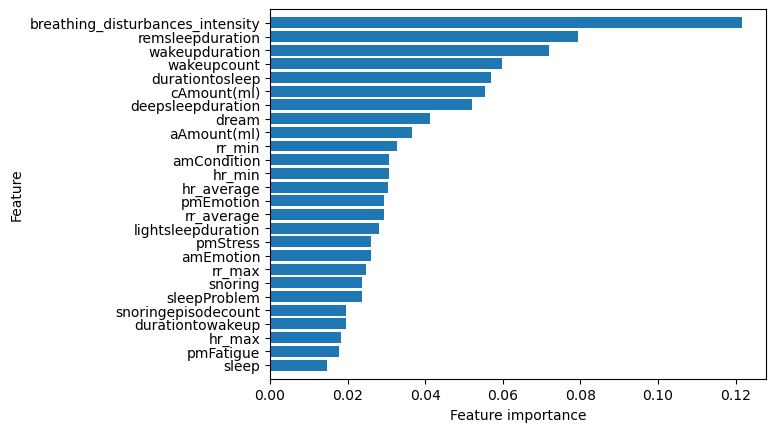

---------------------------------
정확도 :  0.8383233532934131


In [7]:
data=pd.read_csv('ja_data/last.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration']
for x in ['wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount','durationtosleep', 'remsleepduration',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount','sleep_score']:
    data[x]=data[x]/data['total_sleep_time']
data['sleep_classes'] = data['sleep_score'].apply(lambda x: 1 if x>=0.002595014321518081 else 0)
display(data.value_counts('sleep_classes'))
col=data.columns[3:-1]
X=data[col]
X=X.drop(['caffeine','alcohol','sleep_score','startDt', 'endDt','lastUpdate','total_sleep_time'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data[data.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

1. lightsleepduration (0.285692)
2. snoring (0.148992)
3. remsleepduration (0.125854)
4. hr_average (0.067243)
5. rr_average (0.063465)
6. snoringepisodecount (0.053977)
7. wakeupduration (0.046760)
8. rr_max (0.029858)
9. wakeupcount (0.025721)
10. hr_min (0.022644)
11. durationtosleep (0.022389)
12. breathing_disturbances_intensity (0.021912)
13. hr_max (0.021451)
14. amEmotion (0.019068)
15. durationtowakeup (0.015301)
16. pmStress (0.009306)
17. cAmount(ml) (0.007979)
18. amCondition (0.007384)
19. pmFatigue (0.003774)
20. rr_min (0.001232)
21. aAmount(ml) (0.000000)
22. pmEmotion (0.000000)
23. dream (0.000000)
24. sleepProblem (0.000000)
25. sleep (0.000000)


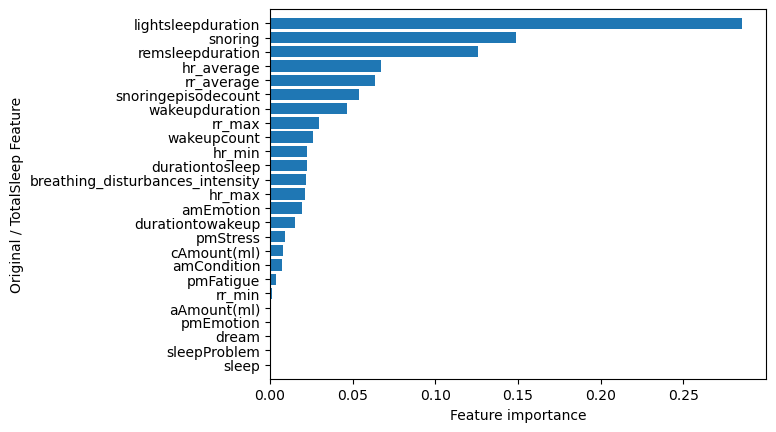

---------------------------------
정확도 :  0.9700598802395209


In [8]:
data=pd.read_csv('ja_data/last.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration'] 
for x in ['wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount','durationtosleep', 'remsleepduration',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount']:
    data[x]=data[x]/data['total_sleep_time']  
data['sleep_classes'] = data['deepsleepduration'].apply(lambda x: 1 if x>=0.2673794848818764 else 0)

col=data.columns[3:-1]
X=data[col]
X=X.drop(['caffeine','alcohol','deepsleepduration','total_sleep_time','sleep_score','startDt', 'endDt',
       'lastUpdate'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data['sleep_classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Original / TotalSleep Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)


# 2019
- origin/totaltime 
    - sleepscore: 0.915
    - waso: 0.989

,pmEmotion,pmStress,ifUnusual,breakfast,lunch,dinner,lateSnack,amCaffAmount,pmCaffAmount,aAmount,...,sleep_score,total_sleep_time,time_in_bed,waso,wakeupcount,aal,movement_index,fragmentation_index,sleep_frag_index,sleep_classes
217,4.0,5.0,1.0,3.0,3.0,3.0,3.0,-1.0,-1.0,-1.0,...,0.003081,26760,1.213004,0.213004,0.000112,0.001183,6.412,25.0,31.412,0
218,4.0,5.0,1.0,3.0,3.0,3.0,3.0,-1.0,-1.0,-1.0,...,0.002710,36120,1.021595,0.021595,0.000055,0.000180,12.060,0.0,12.060,0
219,2.0,2.0,2.0,3.0,2.0,4.0,4.0,-1.0,1.0,-1.0,...,0.005869,16440,1.036496,0.036496,0.000487,0.000076,4.930,0.0,4.930,1
220,2.0,2.0,2.0,3.0,2.0,4.0,4.0,-1.0,1.0,-1.0,...,0.002981,32880,1.020073,0.020073,0.000122,0.000084,1.431,0.0,1.431,0
221,3.0,3.0,2.0,3.0,3.0,4.0,4.0,1.0,1.0,-1.0,...,0.003931,25320,1.004739,0.004739,0.000079,0.000039,2.358,0.0,2.358,1


sleep_classes
0    143
1    143
dtype: int64

1. wakeupcount (0.333509)
2. movement_index (0.077849)
3. aal (0.074097)
4. sleep_frag_index (0.057840)
5. time_in_bed (0.039775)
6. pmCaffAmount (0.038761)
7. aAmount (0.037250)
8. sleepProblem (0.036701)
9. ifUnusual (0.034871)
10. fragmentation_index (0.033100)
11. amCaffAmount (0.031581)
12. lunch (0.029232)
13. pmStress (0.028784)
14. dream (0.028767)
15. amCondition (0.027805)
16. breakfast (0.025231)
17. lateSnack (0.024195)
18. sleep (0.015533)
19. pmEmotion (0.014397)
20. amEmotion (0.010722)
21. total_CaffAmount (0.000000)
22. waso (0.000000)
23. dinner (0.000000)


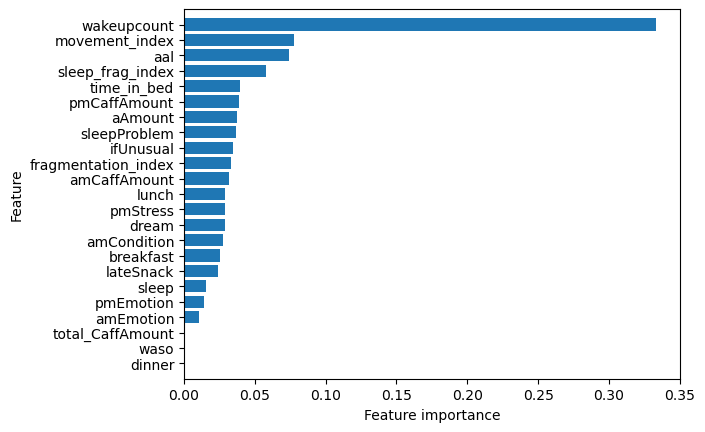

---------------------------------
정확도 :  0.9157894736842105


In [10]:
data=pd.read_csv('ja_data/total1819.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data=data.fillna(-1)
data19=data[data['device']=='Actigraph']
data19=data19.drop(['userId', 'night_inputDt', 'amCaffeine','pmCaffeine','alcohol','device','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['waso','wakeupcount','aal','time_in_bed','sleep_score']:
    data19[x]=data19[x]/data19['total_sleep_time']
data19['sleep_classes'] = data19['sleep_score'].apply(lambda x: 1 if x>=0.0032971272770871973 else 0)
display(data19.head())
display(data19.value_counts('sleep_classes'))
    
col=data19.columns[:-1]
X=data19[col]
X=X.drop(['sleep_score','total_sleep_time'],axis=1)
y=data19['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

sleep_classes
0    143
1    143
dtype: int64

,pmEmotion,pmStress,ifUnusual,breakfast,lunch,dinner,lateSnack,amCaffAmount,pmCaffAmount,aAmount,...,sleep_score,total_sleep_time,time_in_bed,waso,wakeupcount,aal,movement_index,fragmentation_index,sleep_frag_index,sleep_classes
217,4.0,5.0,1.0,3.0,3.0,3.0,3.0,-1.0,-1.0,-1.0,...,82.44,26760,1.213004,0.213004,0.000112,0.001183,6.412,25.0,31.412,1
218,4.0,5.0,1.0,3.0,3.0,3.0,3.0,-1.0,-1.0,-1.0,...,97.89,36120,1.021595,0.021595,0.000055,0.000180,12.060,0.0,12.060,0
219,2.0,2.0,2.0,3.0,2.0,4.0,4.0,-1.0,1.0,-1.0,...,96.48,16440,1.036496,0.036496,0.000487,0.000076,4.930,0.0,4.930,0
220,2.0,2.0,2.0,3.0,2.0,4.0,4.0,-1.0,1.0,-1.0,...,98.03,32880,1.020073,0.020073,0.000122,0.000084,1.431,0.0,1.431,0
221,3.0,3.0,2.0,3.0,3.0,4.0,4.0,1.0,1.0,-1.0,...,99.53,25320,1.004739,0.004739,0.000079,0.000039,2.358,0.0,2.358,0


1. time_in_bed (0.986643)
2. sleep_frag_index (0.013357)
3. aAmount (0.000000)
4. pmStress (0.000000)
5. ifUnusual (0.000000)
6. breakfast (0.000000)
7. lunch (0.000000)
8. dinner (0.000000)
9. lateSnack (0.000000)
10. amCaffAmount (0.000000)
11. pmCaffAmount (0.000000)
12. sleep (0.000000)
13. fragmentation_index (0.000000)
14. sleepProblem (0.000000)
15. dream (0.000000)
16. amCondition (0.000000)
17. amEmotion (0.000000)
18. total_CaffAmount (0.000000)
19. wakeupcount (0.000000)
20. aal (0.000000)
21. movement_index (0.000000)
22. pmEmotion (0.000000)


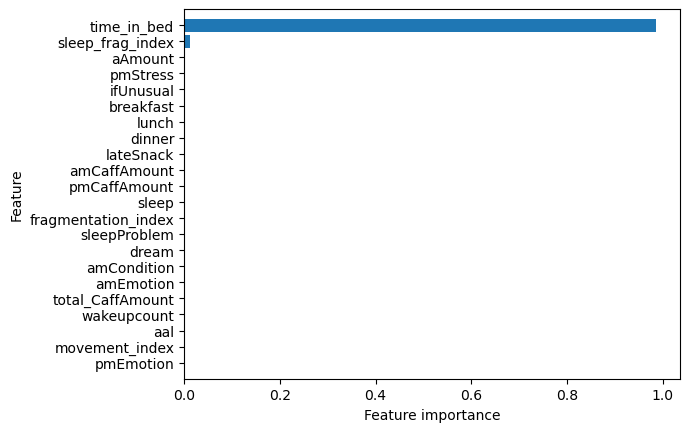

---------------------------------
정확도 :  0.9894736842105263


In [12]:
data=pd.read_csv('ja_data/total1819.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data=data.fillna(-1)
data19=data[data['device']=='Actigraph']
data19=data19.drop(['userId', 'night_inputDt', 'amCaffeine','pmCaffeine','alcohol','device','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['time_in_bed','aal','wakeupcount','waso']:
    data19[x]=data19[x]/data19['total_sleep_time']
data19['sleep_classes'] = data19['waso'].apply(lambda x: 1 if x>=0.03683036861197604 else 0)
display(data19.value_counts('sleep_classes'))
display(data19.head())
    
col=data19.columns[:-1]
X=data19[col]
X=X.drop(['sleep_score','waso','total_sleep_time'],axis=1)
y=data19['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

# 2018
- origin/totaltime 
    - sleepscore: 0.583
    - SleepProblem: 0.527

,pmEmotion,pmStress,ifUnusual,breakfast,lunch,dinner,lateSnack,amCaffAmount,pmCaffAmount,aAmount,sleep,sleepProblem,dream,amCondition,amEmotion,total_CaffAmount,sleep_score,total_sleep_time,time_in_bed,sleep_classes
0,3.0,1.0,2.0,1.0,3.0,3.0,4.0,-1.0,-1.0,-1.0,3.0,3.0,2.0,4.0,5.0,-1.0,0.003982,22800,1.101316,0
1,5.0,4.0,2.0,1.0,3.0,3.0,-1.0,2.0,-1.0,-1.0,3.0,0.0,4.0,3.0,4.0,-1.0,0.004380,21000,1.087143,1
2,3.0,2.0,2.0,2.0,3.0,3.0,4.0,-1.0,1.0,-1.0,4.0,6.0,4.0,2.0,2.0,-1.0,0.004517,19590,1.130168,1
3,4.0,2.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,-1.0,3.0,0.0,4.0,1.0,5.0,2.0,0.004021,22080,1.126359,0
4,3.0,2.0,2.0,1.0,3.0,3.0,2.0,-1.0,-1.0,-1.0,4.0,0.0,4.0,1.0,2.0,-1.0,0.005168,17880,1.082215,1


sleep_classes
1    109
0    108
dtype: int64

1. amEmotion (0.100069)
2. amCondition (0.094163)
3. dream (0.089378)
4. sleepProblem (0.080626)
5. breakfast (0.080418)
6. sleep (0.079024)
7. lateSnack (0.073651)
8. pmStress (0.066355)
9. dinner (0.064539)
10. time_in_bed (0.061230)
11. pmEmotion (0.060412)
12. total_CaffAmount (0.051422)
13. pmCaffAmount (0.044826)
14. ifUnusual (0.027062)
15. lunch (0.026826)
16. amCaffAmount (0.000000)
17. aAmount (0.000000)


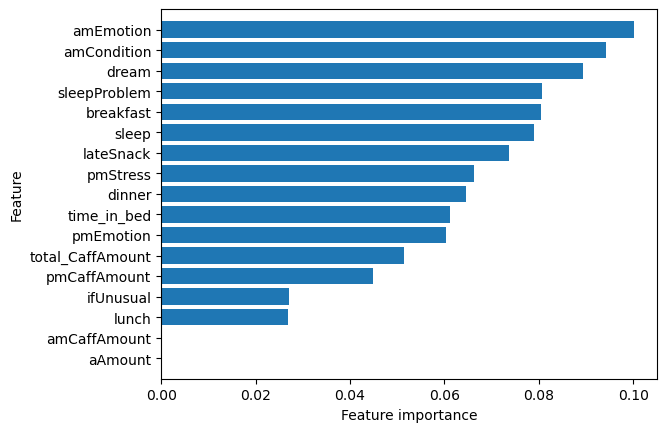

---------------------------------
정확도 :  0.5833333333333334


In [14]:
data=pd.read_csv('ja_data/total1819.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data=data.fillna(-1)
data18=data[data['device']=='Fitbit']
data18=data18.drop(['waso', 'wakeupcount','aal','movement_index','fragmentation_index', 'sleep_frag_index','userId', 'night_inputDt', 'amCaffeine','pmCaffeine','alcohol','device','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['time_in_bed','sleep_score']:
    data18[x]=data18[x]/data18['total_sleep_time']
data18['sleep_classes'] = data18['sleep_score'].apply(lambda x: 1 if x>=0.004045307441314554 else 0)
display(data18.head())
display(data18.value_counts('sleep_classes'))
    
col=data18.columns[:-1]
X=data18[col]
X=X.drop(['sleep_score','total_sleep_time'],axis=1)
y=data18['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#변수 중요도
model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

sleep_classes
1    123
0     94
dtype: int64

1. dream (0.128493)
2. sleep (0.102564)
3. lunch (0.100579)
4. amEmotion (0.091398)
5. total_CaffAmount (0.073036)
6. dinner (0.071755)
7. time_in_bed (0.061003)
8. lateSnack (0.054581)
9. pmStress (0.054567)
10. pmCaffAmount (0.052111)
11. ifUnusual (0.047735)
12. amCaffAmount (0.047212)
13. breakfast (0.042347)
14. amCondition (0.038791)
15. aAmount (0.033828)
16. pmEmotion (0.000000)


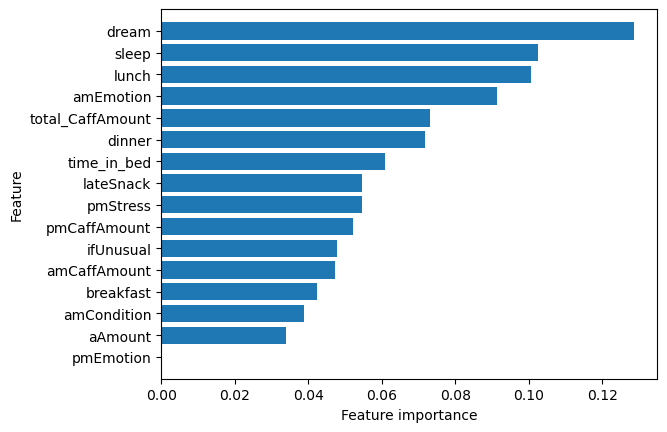

————————————————
정확도 :  0.5277777777777778


In [19]:
data=pd.read_csv('ja_data/total1819.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data=data.fillna(-1)
data18=data[data['device']=='Fitbit']
data18=data18.drop(['waso', 'wakeupcount','aal','movement_index','fragmentation_index', 'sleep_frag_index','userId', 'night_inputDt', 'amCaffeine','pmCaffeine','alcohol','device','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['time_in_bed','total_sleep_time']:
    data18[x]=data18[x]/data18['total_sleep_time']
data18['sleep_classes'] = data18['sleepProblem'].apply(lambda x: 1 if x>=1 else 0)

display(data18.value_counts('sleep_classes'))
    
col=data18.columns[:-1]
X=data18[col]
X=X.drop(['sleep_score','sleepProblem','total_sleep_time'],axis=1)
y=data18['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("————————————————")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)